In [1]:
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models
import pandas as pd
from collections import defaultdict
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

In [2]:
def filter_word_from_corpus(data, words):
    # Ensure words is a list, even if a single string is passed
    
    if isinstance(words, list):
    # Filter words from data
        filtered_data = [[token for token in row if token not in words] for row in data]
        
    return filtered_data

In [3]:
def compute_coherence_values(dictionary, corpus, texts, passes, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, random_state=17)
        model_list.append(lda_model)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values


In [3]:
# Load the data
processed_df = pd.read_csv('../data/lda_processed_content.csv')

# Extract processed content as a list of lists (tokenized documents)
processed_content = [content.split() for content in processed_df['processed_content']]

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

In [7]:


# Train the LDA model
num_topics = 3
lda_model = LdaModel(
    doc_term_matrix,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,  # More passes can improve the model
    random_state=17
)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.021*"zacks" + 0.017*"earnings" + 0.012*"company" + 0.012*"year" + 0.011*"stocks" + 0.010*"growth" + 0.008*"rank" + 0.008*"nasdaq" + 0.007*"stock" + 0.007*"quarter"')
(1, '0.016*"year" + 0.012*"company" + 0.011*"quarter" + 0.010*"million" + 0.010*"nvidia" + 0.009*"nasdaq" + 0.008*"billion" + 0.007*"zacks" + 0.007*"revenues" + 0.006*"technology"')
(2, '0.013*"nasdaq" + 0.007*"nyse" + 0.006*"market" + 0.006*"u" + 0.006*"week" + 0.005*"trade" + 0.005*"stock" + 0.005*"stocks" + 0.005*"nvidia" + 0.005*"shares"')
Coherence Score: 0.4203


In [8]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

# We can now run the function to compute the coherence values for different number of topics. We can then plot the coherence values to determine the optimal number of topics.

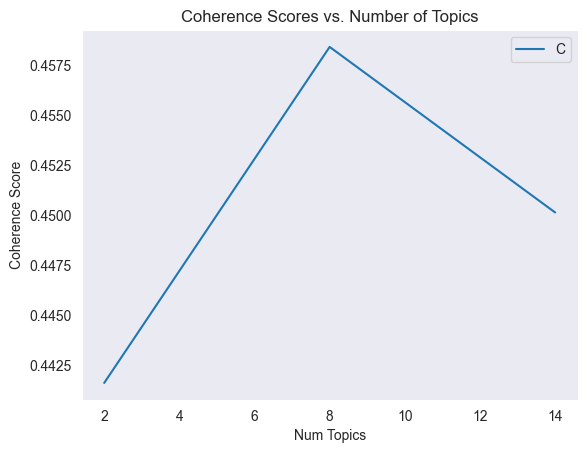

In [10]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=doc_term_matrix,
    texts=processed_content,
    passes=10,
    start=2,
    limit=20,
    step=6
)

limit = 20
start = 2
step = 6
x = range(start, limit, step)

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(("Coherence Values"), loc='best')
plt.title("Coherence Scores vs. Number of Topics")
plt.grid()
plt.show()

# We can see that 8 is probably the best number of topics for now since it has the highest coherence score. We can now train the LDA model with 8 topics and visualize the topics.

In [11]:
# Train the LDA model
num_topics = 8
lda_model = LdaModel(
    doc_term_matrix,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,  # More passes can improve the model
    random_state=17
)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.048*"percent" + 0.008*"new" + 0.007*"said" + 0.007*"p" + 0.006*"shares" + 0.005*"billion" + 0.005*"n" + 0.005*"reuters" + 0.005*"nasdaq" + 0.005*"stocks"')
(1, '0.022*"etf" + 0.019*"fund" + 0.015*"nasdaq" + 0.012*"semiconductor" + 0.010*"technology" + 0.009*"companies" + 0.009*"etfs" + 0.008*"inc" + 0.008*"top" + 0.007*"index"')
(2, '0.015*"nasdaq" + 0.015*"u" + 0.010*"china" + 0.010*"nyse" + 0.009*"trade" + 0.006*"year" + 0.006*"said" + 0.006*"shares" + 0.006*"stocks" + 0.005*"earnings"')
(3, '0.024*"year" + 0.021*"quarter" + 0.021*"zacks" + 0.018*"company" + 0.014*"earnings" + 0.013*"million" + 0.012*"revenues" + 0.010*"growth" + 0.009*"rank" + 0.009*"billion"')
(4, '0.012*"nvidia" + 0.009*"company" + 0.009*"nasdaq" + 0.008*"intel" + 0.007*"amd" + 0.007*"technology" + 0.007*"market" + 0.006*"new" + 0.005*"also" + 0.005*"data"')
(5, '0.053*"nasdaq" + 0.032*"inc" + 0.029*"nvidia" + 0.025*"nyse" + 0.022*"traded" + 0.019*"shares" + 0.016*"trade" + 0.014*"rose" + 0.013*"stock" + 0.

In [12]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

# We can see that the topics are more distinct now. We can also see that there are probably 5 distinct topics in the data. We can now train the LDA model with 5 topics and visualize the topics.

In [13]:
# Train the LDA model
num_topics = 5
lda_model = LdaModel(
    doc_term_matrix,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,  # More passes can improve the model
    random_state=17
)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.009*"stocks" + 0.009*"market" + 0.008*"stock" + 0.008*"zacks" + 0.007*"investment" + 0.007*"earnings" + 0.006*"investors" + 0.005*"week" + 0.005*"nasdaq" + 0.005*"growth"')
(1, '0.016*"nasdaq" + 0.012*"etf" + 0.009*"fund" + 0.008*"stock" + 0.007*"inc" + 0.007*"bitcoin" + 0.006*"nyse" + 0.006*"day" + 0.006*"index" + 0.006*"stocks"')
(2, '0.016*"nasdaq" + 0.011*"u" + 0.010*"nyse" + 0.009*"trade" + 0.007*"china" + 0.007*"shares" + 0.006*"nvidia" + 0.006*"percent" + 0.006*"week" + 0.006*"year"')
(3, '0.022*"year" + 0.021*"zacks" + 0.017*"company" + 0.017*"quarter" + 0.017*"earnings" + 0.011*"growth" + 0.009*"rank" + 0.009*"revenues" + 0.009*"million" + 0.008*"billion"')
(4, '0.012*"nvidia" + 0.009*"nasdaq" + 0.009*"company" + 0.008*"intel" + 0.007*"amd" + 0.007*"technology" + 0.006*"market" + 0.006*"new" + 0.005*"also" + 0.005*"data"')
Coherence Score: 0.4483


# We can see that the topics are more distinct now. We can also see that there are probably 5 distinct topics in the data. We will try with 6 topics to see the difference.

In [14]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [15]:
# Train the LDA model
num_topics = 6
lda_model = LdaModel(
    doc_term_matrix,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,  # More passes can improve the model
    random_state=17
)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.012*"stocks" + 0.012*"zacks" + 0.010*"investment" + 0.009*"stock" + 0.008*"market" + 0.008*"earnings" + 0.006*"research" + 0.006*"investors" + 0.006*"growth" + 0.006*"nasdaq"')
(1, '0.013*"nasdaq" + 0.010*"stock" + 0.009*"market" + 0.008*"day" + 0.007*"trading" + 0.006*"week" + 0.006*"nyse" + 0.006*"bitcoin" + 0.005*"back" + 0.005*"p"')
(2, '0.012*"u" + 0.008*"nasdaq" + 0.008*"china" + 0.007*"trade" + 0.006*"nyse" + 0.006*"year" + 0.006*"percent" + 0.006*"week" + 0.006*"market" + 0.005*"said"')
(3, '0.023*"year" + 0.021*"zacks" + 0.017*"quarter" + 0.017*"company" + 0.017*"earnings" + 0.011*"growth" + 0.010*"million" + 0.010*"revenues" + 0.009*"rank" + 0.008*"billion"')
(4, '0.012*"nvidia" + 0.009*"nasdaq" + 0.009*"company" + 0.008*"intel" + 0.007*"amd" + 0.007*"technology" + 0.006*"market" + 0.006*"new" + 0.005*"also" + 0.005*"data"')
(5, '0.043*"nasdaq" + 0.019*"nvidia" + 0.019*"inc" + 0.018*"nyse" + 0.015*"etf" + 0.015*"shares" + 0.013*"traded" + 0.012*"fund" + 0.012*"index" +

# Although the coherence score is better we can see that there are some topics that are not very distinct. We will stick with 5 topics for now.

In [16]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [6]:
processed_content=filter_word_from_corpus(processed_content, ['nasdaq'])

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

In [22]:
# Train the LDA model
num_topics = 5
lda_model = LdaModel(
    doc_term_matrix,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,  # More passes can improve the model
    random_state=17
)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.021*"year" + 0.019*"zacks" + 0.019*"company" + 0.018*"quarter" + 0.012*"million" + 0.011*"earnings" + 0.011*"revenues" + 0.010*"rank" + 0.009*"growth" + 0.008*"billion"')
(1, '0.021*"zacks" + 0.017*"earnings" + 0.014*"stocks" + 0.011*"year" + 0.011*"growth" + 0.009*"stock" + 0.009*"investment" + 0.008*"company" + 0.007*"research" + 0.006*"rank"')
(2, '0.006*"apple" + 0.006*"technology" + 0.005*"new" + 0.005*"company" + 0.005*"also" + 0.005*"companies" + 0.005*"driving" + 0.005*"said" + 0.004*"like" + 0.004*"google"')
(3, '0.018*"nvidia" + 0.012*"amd" + 0.011*"intel" + 0.010*"year" + 0.008*"market" + 0.008*"semiconductor" + 0.007*"revenue" + 0.006*"billion" + 0.006*"company" + 0.006*"gaming"')
(4, '0.009*"nyse" + 0.008*"u" + 0.007*"trade" + 0.007*"week" + 0.007*"market" + 0.006*"stocks" + 0.006*"p" + 0.006*"stock" + 0.005*"year" + 0.005*"shares"')
Coherence Score: 0.4567


In [23]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [24]:
processed_content=filter_word_from_corpus(processed_content, ['year'])

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

In [25]:
# Train the LDA model
num_topics = 5
lda_model = LdaModel(
    doc_term_matrix,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,  # More passes can improve the model
    random_state=17
)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.018*"earnings" + 0.017*"zacks" + 0.011*"stocks" + 0.011*"growth" + 0.009*"company" + 0.009*"stock" + 0.008*"nvidia" + 0.007*"investment" + 0.006*"q" + 0.006*"quarter"')
(1, '0.013*"nvidia" + 0.009*"intel" + 0.008*"amd" + 0.008*"technology" + 0.008*"company" + 0.007*"market" + 0.006*"driving" + 0.006*"new" + 0.005*"billion" + 0.005*"data"')
(2, '0.008*"market" + 0.006*"stock" + 0.005*"like" + 0.005*"week" + 0.005*"one" + 0.004*"new" + 0.004*"time" + 0.004*"also" + 0.004*"apple" + 0.004*"stocks"')
(3, '0.021*"zacks" + 0.020*"quarter" + 0.019*"company" + 0.013*"million" + 0.013*"earnings" + 0.012*"revenues" + 0.010*"rank" + 0.009*"growth" + 0.009*"billion" + 0.008*"consensus"')
(4, '0.012*"nyse" + 0.011*"u" + 0.009*"trade" + 0.007*"index" + 0.007*"shares" + 0.007*"inc" + 0.007*"p" + 0.006*"china" + 0.006*"week" + 0.006*"nvidia"')
Coherence Score: 0.4806


# The coherence score has improved after removing the word 'year'. We will attempt to remove the word 'company' and see if the coherence score improves.

In [26]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [27]:
processed_content=filter_word_from_corpus(processed_content, ['company'])

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

In [28]:
# Train the LDA model
num_topics = 5
lda_model = LdaModel(
    doc_term_matrix,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,  # More passes can improve the model
    random_state=17
)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.014*"million" + 0.009*"quarter" + 0.009*"zacks" + 0.008*"billion" + 0.007*"revenues" + 0.007*"technology" + 0.006*"also" + 0.006*"growth" + 0.005*"nvidia" + 0.005*"rank"')
(1, '0.019*"earnings" + 0.019*"quarter" + 0.017*"zacks" + 0.011*"nvidia" + 0.011*"growth" + 0.009*"consensus" + 0.009*"estimate" + 0.008*"revenues" + 0.008*"billion" + 0.008*"share"')
(2, '0.009*"nyse" + 0.008*"u" + 0.007*"market" + 0.007*"trade" + 0.007*"week" + 0.006*"p" + 0.006*"stock" + 0.006*"stocks" + 0.005*"shares" + 0.005*"index"')
(3, '0.009*"nvidia" + 0.009*"said" + 0.006*"intel" + 0.005*"chips" + 0.005*"new" + 0.004*"companies" + 0.004*"amd" + 0.004*"technology" + 0.004*"data" + 0.004*"market"')
(4, '0.019*"zacks" + 0.013*"stocks" + 0.010*"earnings" + 0.009*"growth" + 0.009*"investment" + 0.008*"stock" + 0.006*"research" + 0.006*"market" + 0.006*"rank" + 0.006*"industry"')
Coherence Score: 0.4611


# The coherence score has decreased after removing the word 'company'. This could be explained by the fact that the word 'company' refers to the main subject of the documents.

In [29]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [30]:
# Train the LDA model
num_topics = 3
lda_model = LdaModel(
    doc_term_matrix,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,  # More passes can improve the model
    random_state=17
)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.010*"million" + 0.008*"quarter" + 0.008*"nvidia" + 0.008*"billion" + 0.006*"technology" + 0.006*"zacks" + 0.006*"revenues" + 0.005*"also" + 0.005*"market" + 0.005*"intel"')
(1, '0.022*"zacks" + 0.019*"earnings" + 0.011*"stocks" + 0.011*"growth" + 0.010*"quarter" + 0.008*"nvidia" + 0.008*"stock" + 0.008*"rank" + 0.006*"estimate" + 0.006*"consensus"')
(2, '0.008*"nyse" + 0.007*"u" + 0.007*"market" + 0.006*"week" + 0.006*"trade" + 0.005*"stock" + 0.005*"stocks" + 0.005*"shares" + 0.005*"p" + 0.005*"nvidia"')
Coherence Score: 0.4497


In [31]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [5]:
filtered_list=['nasdaq','year','company']

processed_content=filter_word_from_corpus(processed_content,filtered_list)

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

# We can see from the plot that number 8 functions like an elbow plot. It seems that it is the most appropriate number for topics but we will investigate further to be sure. 

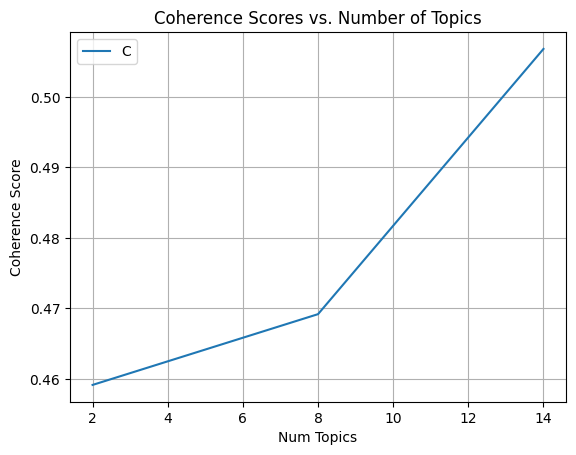

In [12]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=doc_term_matrix,
    texts=processed_content,
    passes=10,
    start=2,
    limit=20,
    step=6
)

limit = 20
start = 2
step = 6
x = range(start, limit, step)

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(("Coherence Values"), loc='best')
plt.title("Coherence Scores vs. Number of Topics")
plt.grid()
plt.show()

# I am going to run between 5 and 8 to see the difference with different hyperparameters. Topic 8 wins in most cases and we also get 55% coherence score but it is not reproducible.

In [13]:
def calculate_coherence_score(num_topics, alpha, beta):
    lda_model = LdaModel(
        doc_term_matrix,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha=alpha,
        per_word_topics=True,
        eta=beta
    )
    # Get coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    return coherence_lda

# List containing various hyperparameters
number_of_topics = [5, 8]
alpha_list = ['symmetric', 0.3, 0.5, 0.7]
beta_list = ['auto', 0.3, 0.5, 0.7]

for num_topics in number_of_topics:
    for alpha in alpha_list:
        for beta in beta_list:
            coherence_score = calculate_coherence_score(num_topics, alpha, beta)
            print(f"Num Topics: {num_topics}; Alpha: {alpha}; Beta: {beta}; Score: {coherence_score}")

Num Topics: 5; Alpha: symmetric; Beta: auto; Score: 0.477289583281402
Num Topics: 5; Alpha: symmetric; Beta: 0.3; Score: 0.4766722688836258
Num Topics: 5; Alpha: symmetric; Beta: 0.5; Score: 0.49713269665782134
Num Topics: 5; Alpha: symmetric; Beta: 0.7; Score: 0.4938935639299122
Num Topics: 5; Alpha: 0.3; Beta: auto; Score: 0.47728958328140186
Num Topics: 5; Alpha: 0.3; Beta: 0.3; Score: 0.48578824957583555
Num Topics: 5; Alpha: 0.3; Beta: 0.5; Score: 0.49713269665782134
Num Topics: 5; Alpha: 0.3; Beta: 0.7; Score: 0.5311485488925003
Num Topics: 5; Alpha: 0.5; Beta: auto; Score: 0.48485755601629743
Num Topics: 5; Alpha: 0.5; Beta: 0.3; Score: 0.4911370572719602
Num Topics: 5; Alpha: 0.5; Beta: 0.5; Score: 0.49392041730789116
Num Topics: 5; Alpha: 0.5; Beta: 0.7; Score: 0.5158068709965878
Num Topics: 5; Alpha: 0.7; Beta: auto; Score: 0.48294122121483446
Num Topics: 5; Alpha: 0.7; Beta: 0.3; Score: 0.49101346266834184
Num Topics: 5; Alpha: 0.7; Beta: 0.5; Score: 0.4863788507499379
Num T

In [6]:
# Train the LDA model
num_topics = 8
alpha = 'symmetric'
beta = 'auto'
lda_model = LdaModel(
    doc_term_matrix,
    id2word= dictionary,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha= alpha,
    per_word_topics=True,
    eta=beta
)
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Num Topics: {num_topics}; Alpha: {alpha}; Beta: {beta}; Score: {coherence_score}")

(0, '0.048*"nvidia" + 0.033*"traded" + 0.027*"stock" + 0.022*"day" + 0.022*"nvda" + 0.016*"shares" + 0.015*"inc" + 0.015*"days" + 0.013*"volume" + 0.013*"past"')
(1, '0.022*"semiconductor" + 0.020*"etf" + 0.014*"fund" + 0.011*"technology" + 0.010*"read" + 0.010*"companies" + 0.010*"top" + 0.009*"industry" + 0.008*"stocks" + 0.007*"sector"')
(2, '0.011*"market" + 0.008*"stock" + 0.008*"investors" + 0.007*"one" + 0.006*"last" + 0.006*"stocks" + 0.006*"week" + 0.006*"today" + 0.006*"time" + 0.006*"could"')
(3, '0.020*"amd" + 0.018*"nvidia" + 0.009*"new" + 0.009*"data" + 0.009*"market" + 0.008*"graphics" + 0.007*"intel" + 0.007*"gaming" + 0.006*"cloud" + 0.006*"also"')
(4, '0.022*"said" + 0.016*"driving" + 0.013*"self" + 0.010*"qualcomm" + 0.008*"autonomous" + 0.008*"companies" + 0.008*"nvidia" + 0.008*"technology" + 0.008*"cars" + 0.007*"car"')
(5, '0.031*"zacks" + 0.025*"quarter" + 0.023*"earnings" + 0.014*"growth" + 0.014*"million" + 0.013*"rank" + 0.012*"revenues" + 0.011*"stocks" + 0.

In [7]:


# 1. Calculate Perplexity
perplexity_score = lda_model.log_perplexity(doc_term_matrix)
print(f'Perplexity: {perplexity_score}')

# 2. Calculate Diversity
def calculate_diversity_score(lda_model, num_words=10):
    unique_words = set()
    for topic in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words = [word[0] for word in topic[1]]  # Get only the word part
        unique_words.update(words)
    diversity_score = len(unique_words) / (len(lda_model.print_topics()) * num_words)  # Normalized by number of topics
    return diversity_score

diversity_score = calculate_diversity_score(lda_model)
print(f'Diversity Score: {diversity_score:.4f}')
print(f'Coherence Score: {coherence_score:.4f}')
print(f'Interpretability Score: {coherence_score * diversity_score:.4f}')

Perplexity: -8.046718295831965
Diversity Score: 0.8750
Coherence Score: 0.5079
Interpretability Score: 0.4444


In [8]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [17]:
# Train the LDA model
num_topics = 14
lda_model = LdaModel(
    doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='symmetric',
    per_word_topics=True,
    eta='auto'
)
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.043*"traded" + 0.041*"nvidia" + 0.037*"stock" + 0.036*"day" + 0.024*"nvda" + 0.024*"inc" + 0.022*"range" + 0.021*"volume" + 0.018*"days" + 0.016*"start"')
(1, '0.035*"said" + 0.021*"china" + 0.017*"billion" + 0.015*"chief" + 0.015*"president" + 0.014*"percent" + 0.014*"officer" + 0.013*"u" + 0.011*"qualcomm" + 0.011*"executive"')
(2, '0.014*"might" + 0.013*"could" + 0.010*"market" + 0.010*"q" + 0.008*"last" + 0.008*"week" + 0.008*"good" + 0.007*"see" + 0.007*"results" + 0.007*"one"')
(3, '0.013*"technology" + 0.013*"etf" + 0.011*"companies" + 0.009*"fund" + 0.008*"also" + 0.007*"zacks" + 0.007*"top" + 0.006*"new" + 0.005*"digital" + 0.005*"industry"')
(4, '0.049*"driving" + 0.038*"self" + 0.028*"autonomous" + 0.025*"cars" + 0.023*"nvidia" + 0.022*"vehicles" + 0.019*"car" + 0.015*"vehicle" + 0.015*"tesla" + 0.012*"automotive"')
(5, '0.030*"quarter" + 0.030*"zacks" + 0.022*"million" + 0.017*"revenues" + 0.016*"earnings" + 0.015*"rank" + 0.013*"growth" + 0.011*"billion" + 0.011*"co

In [18]:


# 1. Calculate Perplexity
perplexity_score = lda_model.log_perplexity(doc_term_matrix)
print(f'Perplexity: {perplexity_score}')


# 2. Calculate Diversity
def calculate_diversity_score(lda_model, num_words=10):
    unique_words = set()
    for topic in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words = [word[0] for word in topic[1]]  # Get only the word part
        unique_words.update(words)
    diversity_score = len(unique_words) / (len(lda_model.print_topics()) * num_words)  # Normalized by number of topics
    return diversity_score


diversity_score = calculate_diversity_score(lda_model)
print(f'Diversity Score: {diversity_score:.4f}')
print(f'Coherence Score: {coherence_score:.4f}')
print(f'Interpretability Score: {coherence_score * diversity_score:.4f}')

Perplexity: -9.34447569013195
Diversity Score: 0.7929
Coherence Score: 0.5161
Interpretability Score: 0.4092


In [19]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [20]:
# Load the data
processed_df = pd.read_csv('../data/lda_processed_content_lemmatised.csv')

# Extract processed content as a list of lists (tokenized documents)
processed_content_lemmatised = [content.split() for content in processed_df['processed_content']]

# Create a dictionary from the processed content
dictionary_lemmatised = corpora.Dictionary(processed_content_lemmatised)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix_lemmatised = [dictionary_lemmatised.doc2bow(doc) for doc in processed_content_lemmatised]

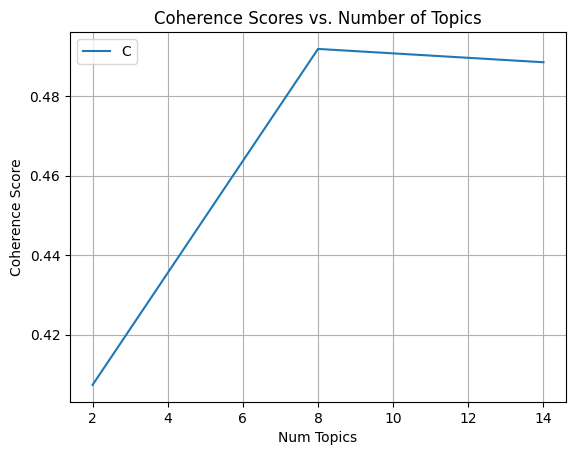

In [22]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary_lemmatised,
    corpus=doc_term_matrix_lemmatised,
    texts=processed_content_lemmatised,
    passes=10,
    start=2,
    limit=20,
    step=6
)

limit = 20
start = 2
step = 6
x = range(start, limit, step)

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(("Coherence Values"), loc='best')
plt.title("Coherence Scores vs. Number of Topics")
plt.grid()
plt.show()

In [23]:
# Train the LDA model
num_topics = 8
lda_model = LdaModel(
    doc_term_matrix_lemmatised,
    id2word=dictionary_lemmatised,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='symmetric',
    per_word_topics=True,
    eta='auto'
)
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content_lemmatised, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.045*"year" + 0.044*"quarter" + 0.037*"revenue" + 0.024*"million" + 0.018*"share" + 0.016*"billion" + 0.015*"earnings" + 0.014*"estimate" + 0.013*"company" + 0.012*"consensus"')
(1, '0.012*"market" + 0.009*"think" + 0.008*"time" + 0.008*"like" + 0.008*"one" + 0.007*"week" + 0.007*"today" + 0.007*"could" + 0.006*"know" + 0.006*"get"')
(2, '0.030*"bitcoin" + 0.028*"etf" + 0.018*"fund" + 0.014*"driving" + 0.012*"car" + 0.012*"technology" + 0.012*"company" + 0.010*"self" + 0.010*"vehicle" + 0.010*"nvidia"')
(3, '0.035*"amd" + 0.017*"nvidia" + 0.014*"chip" + 0.012*"graphic" + 0.012*"intel" + 0.009*"said" + 0.009*"new" + 0.008*"company" + 0.008*"device" + 0.008*"data"')
(4, '0.032*"zacks" + 0.025*"company" + 0.018*"rank" + 0.016*"stock" + 0.012*"nasdaq" + 0.009*"buy" + 0.009*"growth" + 0.009*"market" + 0.009*"inc" + 0.008*"product"')
(5, '0.027*"stock" + 0.025*"earnings" + 0.021*"year" + 0.014*"growth" + 0.013*"company" + 0.012*"investor" + 0.010*"estimate" + 0.010*"nvidia" + 0.010*"ma

In [24]:


# 1. Calculate Perplexity
perplexity_score = lda_model.log_perplexity(doc_term_matrix_lemmatised)
print(f'Perplexity: {perplexity_score}')


# 2. Calculate Diversity
def calculate_diversity_score(lda_model, num_words=10):
    unique_words = set()
    for topic in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words = [word[0] for word in topic[1]]  # Get only the word part
        unique_words.update(words)
    diversity_score = len(unique_words) / (len(lda_model.print_topics()) * num_words)  # Normalized by number of topics
    return diversity_score


diversity_score = calculate_diversity_score(lda_model)
print(f'Diversity Score: {diversity_score:.4f}')
print(f'Coherence Score: {coherence_score:.4f}')
print(f'Interpretability Score: {coherence_score * diversity_score:.4f}')

Perplexity: -7.7459673846943256
Diversity Score: 0.7375
Coherence Score: 0.4993
Interpretability Score: 0.3682


In [25]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix_lemmatised, dictionary_lemmatised)
pyLDAvis.display(vis)

In [26]:
filtered_list=['nasdaq','year','company']

processed_content = filter_word_from_corpus(processed_content_lemmatised,filtered_list)

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

In [27]:
# Train the LDA model
num_topics = 8
lda_model = LdaModel(
    doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='symmetric',
    per_word_topics=True,
    eta='auto'
)
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.019*"amd" + 0.015*"nvidia" + 0.009*"market" + 0.009*"new" + 0.009*"graphic" + 0.008*"data" + 0.006*"also" + 0.006*"product" + 0.006*"business" + 0.006*"device"')
(1, '0.030*"etf" + 0.027*"bitcoin" + 0.017*"fund" + 0.011*"investor" + 0.010*"portfolio" + 0.009*"stock" + 0.009*"read" + 0.008*"value" + 0.008*"investment" + 0.007*"asset"')
(2, '0.024*"said" + 0.024*"driving" + 0.021*"car" + 0.018*"self" + 0.017*"vehicle" + 0.016*"chip" + 0.016*"nvidia" + 0.014*"qualcomm" + 0.014*"technology" + 0.013*"autonomous"')
(3, '0.051*"nvidia" + 0.043*"traded" + 0.038*"inc" + 0.032*"share" + 0.030*"day" + 0.028*"nyse" + 0.026*"stock" + 0.022*"com" + 0.021*"session" + 0.021*"trade"')
(4, '0.025*"u" + 0.011*"percent" + 0.011*"china" + 0.008*"said" + 0.008*"trade" + 0.008*"sale" + 0.007*"data" + 0.007*"market" + 0.007*"president" + 0.006*"rate"')
(5, '0.017*"stock" + 0.013*"market" + 0.010*"week" + 0.010*"day" + 0.007*"price" + 0.007*"time" + 0.007*"trading" + 0.006*"last" + 0.006*"higher" + 0.00

In [28]:


# 1. Calculate Perplexity
perplexity_score = lda_model.log_perplexity(doc_term_matrix)
print(f'Perplexity: {perplexity_score}')


# 2. Calculate Diversity
def calculate_diversity_score(lda_model, num_words=10):
    unique_words = set()
    for topic in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words = [word[0] for word in topic[1]]  # Get only the word part
        unique_words.update(words)
    diversity_score = len(unique_words) / (len(lda_model.print_topics()) * num_words)  # Normalized by number of topics
    return diversity_score


diversity_score = calculate_diversity_score(lda_model)
print(f'Diversity Score: {diversity_score:.4f}')
print(f'Coherence Score: {coherence_score:.4f}')
print(f'Interpretability Score: {coherence_score * diversity_score:.4f}')

Perplexity: -7.817876509865428
Diversity Score: 0.7500
Coherence Score: 0.4901
Interpretability Score: 0.3675


In [29]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

# Since there is no improvement, we are going to try with stemming.

In [11]:
# Load the data
processed_df = pd.read_csv('../data/lda_processed_content_stemming.csv')

# Extract processed content as a list of lists (tokenized documents)
processed_content = [content.split() for content in processed_df['processed_content']]

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

In [12]:
# Train the LDA model
num_topics = 8
lda_model = LdaModel(
    doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='symmetric',
    per_word_topics=True,
    eta='auto'
)
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.036*"stock" + 0.024*"zack" + 0.019*"earn" + 0.015*"invest" + 0.014*"compani" + 0.013*"year" + 0.013*"growth" + 0.010*"market" + 0.009*"rank" + 0.009*"investor"')
(1, '0.022*"amd" + 0.016*"nvidia" + 0.011*"gpu" + 0.011*"game" + 0.011*"nasdaq" + 0.010*"compani" + 0.009*"graphic" + 0.009*"market" + 0.009*"new" + 0.009*"intel"')
(2, '0.027*"trade" + 0.021*"nasdaq" + 0.017*"stock" + 0.015*"day" + 0.013*"nvidia" + 0.012*"nyse" + 0.010*"share" + 0.009*"week" + 0.009*"close" + 0.009*"p"')
(3, '0.048*"drive" + 0.039*"car" + 0.033*"vehicl" + 0.031*"self" + 0.025*"autonom" + 0.020*"nvidia" + 0.016*"compani" + 0.015*"said" + 0.013*"robot" + 0.013*"technolog"')
(4, '0.033*"year" + 0.031*"quarter" + 0.025*"revenu" + 0.021*"compani" + 0.020*"zack" + 0.018*"million" + 0.016*"earn" + 0.013*"estim" + 0.012*"expect" + 0.011*"share"')
(5, '0.014*"year" + 0.012*"etf" + 0.011*"expect" + 0.011*"share" + 0.011*"analyst" + 0.010*"bitcoin" + 0.010*"semiconductor" + 0.009*"china" + 0.009*"sale" + 0.009*"n

In [13]:


# 1. Calculate Perplexity
perplexity_score = lda_model.log_perplexity(doc_term_matrix)
print(f'Perplexity: {perplexity_score}')


# 2. Calculate Diversity
def calculate_diversity_score(lda_model, num_words=10):
    unique_words = set()
    for topic in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words = [word[0] for word in topic[1]]  # Get only the word part
        unique_words.update(words)
    diversity_score = len(unique_words) / (len(lda_model.print_topics()) * num_words)  # Normalized by number of topics
    return diversity_score


diversity_score = calculate_diversity_score(lda_model)
print(f'Diversity Score: {diversity_score:.4f}')
print(f'Coherence Score: {coherence_score:.4f}')
print(f'Interpretability Score: {coherence_score * diversity_score:.4f}')

Perplexity: -7.410786347822162
Diversity Score: 0.7125
Coherence Score: 0.4908
Interpretability Score: 0.3497


In [14]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [15]:
filtered_list=['nasdaq','year','compani']

processed_content = filter_word_from_corpus(processed_content,filtered_list)

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

In [16]:
# Train the LDA model
num_topics = 8
lda_model = LdaModel(
    doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='symmetric',
    per_word_topics=True,
    eta='auto'
)
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.020*"zack" + 0.015*"rank" + 0.014*"stock" + 0.014*"etf" + 0.014*"technolog" + 0.013*"market" + 0.010*"growth" + 0.010*"product" + 0.008*"fund" + 0.007*"top"')
(1, '0.026*"drive" + 0.020*"car" + 0.017*"vehicl" + 0.016*"self" + 0.015*"nvidia" + 0.015*"technolog" + 0.014*"said" + 0.012*"autonom" + 0.012*"ai" + 0.010*"develop"')
(2, '0.014*"market" + 0.008*"week" + 0.006*"investor" + 0.006*"u" + 0.006*"price" + 0.006*"could" + 0.006*"last" + 0.006*"look" + 0.005*"data" + 0.005*"trade"')
(3, '0.038*"trade" + 0.023*"stock" + 0.020*"nvidia" + 0.020*"day" + 0.017*"share" + 0.017*"nyse" + 0.014*"index" + 0.013*"percent" + 0.013*"close" + 0.012*"p"')
(4, '0.035*"stock" + 0.023*"zack" + 0.021*"earn" + 0.015*"invest" + 0.012*"growth" + 0.010*"investor" + 0.010*"estim" + 0.009*"market" + 0.009*"buy" + 0.008*"research"')
(5, '0.037*"amd" + 0.031*"nvidia" + 0.017*"gpu" + 0.016*"graphic" + 0.015*"chip" + 0.012*"share" + 0.012*"game" + 0.012*"intel" + 0.010*"analyst" + 0.010*"market"')
(6, '0.02

In [17]:


# 1. Calculate Perplexity
perplexity_score = lda_model.log_perplexity(doc_term_matrix)
print(f'Perplexity: {perplexity_score}')


# 2. Calculate Diversity
def calculate_diversity_score(lda_model, num_words=10):
    unique_words = set()
    for topic in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words = [word[0] for word in topic[1]]  # Get only the word part
        unique_words.update(words)
    diversity_score = len(unique_words) / (len(lda_model.print_topics()) * num_words)  # Normalized by number of topics
    return diversity_score


diversity_score = calculate_diversity_score(lda_model)
print(f'Diversity Score: {diversity_score:.4f}')
print(f'Coherence Score: {coherence_score:.4f}')
print(f'Interpretability Score: {coherence_score * diversity_score:.4f}')

Perplexity: -7.475686720826991
Diversity Score: 0.7875
Coherence Score: 0.4936
Interpretability Score: 0.3887


## Topic Breakdown

### Topic 0
- **Key Terms**: "zack," "rank," "stock," "etf," "technolog," "market," "growth," "product," "fund," "top"
- **Interpretation**: This topic appears to focus on financial metrics and rankings, potentially related to stock market analysis. The presence of terms like "Zack" (possibly referring to Zacks Investment Research) indicates a financial context, discussing investment rankings, stock performance, and exchange-traded funds (ETFs). This could relate to discussions about high-performing stocks and investment products in technology.

### Topic 1
- **Key Terms**: "drive," "car," "vehicl," "self," "nvidia," "technolog," "said," "autonom," "ai," "develop"
- **Interpretation**: This topic centers around autonomous vehicle technology and AI developments. The frequent occurrence of "self," "drive," and "car" suggests a focus on self-driving cars, with NVIDIA’s involvement in this field. This topic likely includes discussions about advancements in autonomous vehicles and related technologies.

### Topic 2
- **Key Terms**: "market," "week," "investor," "u," "price," "could," "last," "look," "data," "trade"
- **Interpretation**: This topic reflects general market discussions, focusing on market trends and investor behaviors. The terms suggest analysis of stock prices and trading activity, indicating that articles in this topic may discuss recent market developments, trading strategies, and potential investment opportunities.

### Topic 3
- **Key Terms**: "trade," "stock," "nvidia," "day," "share," "nyse," "index," "percent," "close," "p"
- **Interpretation**: This topic is centered around stock trading activity, specifically related to NVIDIA. It emphasizes daily trading metrics, share prices, and performance on major exchanges like the NYSE. It likely involves articles discussing daily stock movements, trading volumes, and related financial metrics.

### Topic 4
- **Key Terms**: "stock," "zack," "earn," "invest," "growth," "investor," "estim," "market," "buy," "research"
- **Interpretation**: This topic focuses on financial performance, particularly earnings reports and investment strategies. Terms like "earn" and "estimates" indicate discussions surrounding company performance, particularly NVIDIA’s, as well as investment recommendations and growth prospects.

### Topic 5
- **Key Terms**: "amd," "nvidia," "gpu," "graphic," "chip," "share," "game," "intel," "analyst," "market"
- **Interpretation**: This topic highlights the competitive landscape in the graphics processing unit (GPU) market, specifically the competition between NVIDIA, AMD, and Intel. The presence of terms like "GPU," "graphic," and "game" suggests discussions around gaming technology and advancements in graphics processing.

### Topic 6
- **Key Terms**: "bitcoin," "game," "new," "cryptocurr," "also," "make," "googl," "like," "use," "amazon"
- **Interpretation**: This topic appears to relate to the cryptocurrency market, specifically Bitcoin, with some crossover to technology and gaming. Terms like "new" and "make" suggest discussions about innovations or developments in cryptocurrency and its applications in gaming or other tech sectors.

### Topic 7
- **Key Terms**: "quarter," "revenu," "million," "earn," "estim," "zack," "billion," "expect," "consensu," "report"
- **Interpretation**: This topic is focused on financial reporting, specifically earnings reports and revenue estimates. It highlights discussions about quarterly earnings, expectations, and consensus estimates from financial analysts, suggesting a strong emphasis on financial performance metrics.


### Analysis of LDA Model Topics

This model proves to be the best in terms of intertopic distance and topic explainability. While it has a slightly lower coherence score (**0.4936**) compared to other models, the difference of only **1%** is not significant and suggests that the model maintains meaningful relationships between topics.

### Summary of Insights
The identified topics cover a broad range of subjects related to NVIDIA and the technology and financial markets, including stock performance, autonomous vehicle technology, cryptocurrency, and competitive analysis in the GPU market.

- The coherence score indicates that, despite being slightly lower, the topics are well-defined and relevant to the overarching themes of technology and finance.
- The diversity and intertopic distance of the model further enhance its utility, ensuring that topics are distinct and not overly overlapping, which improves interpretability.

### Distinct Topics Identified:

- **Self-Driving Cars with AI**: Focuses on advancements in autonomous vehicle technology, showcasing NVIDIA's involvement in this emerging field.
- **Cryptocurrency and Blockchain**: Highlights discussions around the cryptocurrency market, particularly Bitcoin, and its applications in gaming and technology.
- **ZACKS Investment Research**: Emphasizes financial metrics, rankings, and investment strategies, indicating interest in stock performance analysis and investment products.
- **New York Stock Exchange News**: Centers on stock trading activity, particularly related to NVIDIA, with discussions on daily trading metrics and share prices.
- **Competitive Landscape in the GPU Market**: Analyzes the rivalry between NVIDIA, AMD, and Intel, reflecting ongoing developments in graphics processing and gaming technology.
- **General Market Discussions**: Covers broader market trends, investor behaviors, and trading strategies, providing insights into recent market developments.




In [18]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [19]:
filtered_list=['nasdaq','year','compani','stock']

processed_content = filter_word_from_corpus(processed_content,filtered_list)

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

In [20]:
# Train the LDA model
num_topics = 8
lda_model = LdaModel(
    doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='symmetric',
    per_word_topics=True,
    eta='auto'
)
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.031*"amd" + 0.018*"chip" + 0.016*"semiconductor" + 0.015*"intel" + 0.012*"nvidia" + 0.011*"technolog" + 0.010*"devic" + 0.008*"cryptocurr" + 0.008*"product" + 0.007*"mine"')
(1, '0.034*"etf" + 0.032*"bitcoin" + 0.021*"invest" + 0.020*"fund" + 0.013*"zack" + 0.012*"portfolio" + 0.011*"investor" + 0.011*"read" + 0.009*"asset" + 0.009*"hold"')
(2, '0.029*"earn" + 0.023*"zack" + 0.015*"estim" + 0.015*"growth" + 0.011*"expect" + 0.010*"invest" + 0.010*"rank" + 0.010*"share" + 0.010*"report" + 0.010*"nvidia"')
(3, '0.025*"quarter" + 0.021*"revenu" + 0.017*"million" + 0.016*"zack" + 0.010*"share" + 0.010*"growth" + 0.010*"billion" + 0.010*"expect" + 0.009*"rank" + 0.009*"increas"')
(4, '0.016*"nvidia" + 0.015*"drive" + 0.010*"new" + 0.009*"car" + 0.009*"ai" + 0.009*"game" + 0.008*"googl" + 0.008*"technolog" + 0.008*"self" + 0.008*"vehicl"')
(5, '0.014*"market" + 0.010*"look" + 0.009*"day" + 0.009*"trade" + 0.008*"week" + 0.008*"like" + 0.008*"time" + 0.008*"think" + 0.007*"one" + 0.007

In [21]:


# 1. Calculate Perplexity
perplexity_score = lda_model.log_perplexity(doc_term_matrix)
print(f'Perplexity: {perplexity_score}')


# 2. Calculate Diversity
def calculate_diversity_score(lda_model, num_words=10):
    unique_words = set()
    for topic in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words = [word[0] for word in topic[1]]  # Get only the word part
        unique_words.update(words)
    diversity_score = len(unique_words) / (len(lda_model.print_topics()) * num_words)  # Normalized by number of topics
    return diversity_score


diversity_score = calculate_diversity_score(lda_model)
print(f'Diversity Score: {diversity_score:.4f}')
print(f'Coherence Score: {coherence_score:.4f}')
print(f'Interpretability Score: {coherence_score * diversity_score:.4f}')

Perplexity: -7.495395353437814
Diversity Score: 0.7625
Coherence Score: 0.4636
Interpretability Score: 0.3535


# As expected removing the word 'stock' decreased the coherence score. From the previous visualisation we can see that stock associates better with a specific topic, namely Zacks Investment Research.

In [22]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

# We can see that removing the word 'compani' and later by removing the word 'nasdaq' decreases the coherence score. By further training the models we can see that by removing the words (Year, Company and Nasdaq) yields the best intertopic distance and also grants the better coherence score in comparison to the models below.

In [4]:
# Load the data
processed_df = pd.read_csv('../data/lda_processed_content_stemming.csv')

# Extract processed content as a list of lists (tokenized documents)
processed_content = [content.split() for content in processed_df['processed_content']]

filtered_list=['nasdaq','year']

processed_content = filter_word_from_corpus(processed_content,filtered_list)

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

In [5]:
# Train the LDA model
num_topics = 8
lda_model = LdaModel(
    doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='symmetric',
    per_word_topics=True,
    eta='auto'
)
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.027*"quarter" + 0.023*"earn" + 0.022*"compani" + 0.022*"zack" + 0.021*"revenu" + 0.016*"estim" + 0.015*"growth" + 0.014*"stock" + 0.014*"million" + 0.013*"expect"')
(1, '0.022*"drive" + 0.022*"compani" + 0.017*"technolog" + 0.016*"car" + 0.013*"vehicl" + 0.012*"self" + 0.011*"ai" + 0.010*"develop" + 0.010*"system" + 0.010*"autonom"')
(2, '0.023*"stock" + 0.020*"invest" + 0.019*"zack" + 0.013*"etf" + 0.010*"bitcoin" + 0.010*"research" + 0.010*"compani" + 0.009*"market" + 0.008*"buy" + 0.008*"fund"')
(3, '0.012*"market" + 0.012*"stock" + 0.008*"look" + 0.008*"week" + 0.008*"investor" + 0.007*"last" + 0.007*"time" + 0.007*"price" + 0.007*"one" + 0.006*"like"')
(4, '0.028*"googl" + 0.025*"amazon" + 0.022*"appl" + 0.021*"servic" + 0.019*"user" + 0.019*"game" + 0.017*"microsoft" + 0.016*"facebook" + 0.014*"cloud" + 0.012*"video"')
(5, '0.061*"trade" + 0.038*"nvidia" + 0.034*"day" + 0.029*"stock" + 0.024*"inc" + 0.024*"nyse" + 0.022*"share" + 0.019*"nvda" + 0.017*"session" + 0.015*"clo

In [6]:


# 1. Calculate Perplexity
perplexity_score = lda_model.log_perplexity(doc_term_matrix)
print(f'Perplexity: {perplexity_score}')


# 2. Calculate Diversity
def calculate_diversity_score(lda_model, num_words=10):
    unique_words = set()
    for topic in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words = [word[0] for word in topic[1]]  # Get only the word part
        unique_words.update(words)
    diversity_score = len(unique_words) / (len(lda_model.print_topics()) * num_words)  # Normalized by number of topics
    return diversity_score


diversity_score = calculate_diversity_score(lda_model)
print(f'Diversity Score: {diversity_score:.4f}')
print(f'Coherence Score: {coherence_score:.4f}')
print(f'Interpretability Score: {coherence_score * diversity_score:.4f}')

Perplexity: -7.446840081564364
Diversity Score: 0.8250
Coherence Score: 0.4911
Interpretability Score: 0.4051


In [7]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [35]:
# Load the data
processed_df = pd.read_csv('../data/lda_processed_content_stemming.csv')

# Extract processed content as a list of lists (tokenized documents)
processed_content = [content.split() for content in processed_df['processed_content']]

filtered_list=['year']

processed_content = filter_word_from_corpus(processed_content,filtered_list)

# Create a dictionary from the processed content
dictionary = corpora.Dictionary(processed_content)

# Convert the list of documents (corpus) into Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_content]

In [36]:
# Train the LDA model
num_topics = 8
lda_model = LdaModel(
    doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='symmetric',
    per_word_topics=True,
    eta='auto'
)
# Print the topics
for topic in lda_model.print_topics():
    print(topic)

# Get coherence score
coherence_model = CoherenceModel(model=lda_model, texts=processed_content, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

(0, '0.027*"quarter" + 0.023*"earn" + 0.022*"compani" + 0.022*"zack" + 0.021*"revenu" + 0.016*"estim" + 0.015*"growth" + 0.014*"stock" + 0.014*"million" + 0.013*"expect"')
(1, '0.022*"drive" + 0.022*"compani" + 0.017*"technolog" + 0.016*"car" + 0.013*"vehicl" + 0.012*"self" + 0.011*"ai" + 0.010*"develop" + 0.010*"system" + 0.010*"autonom"')
(2, '0.023*"stock" + 0.020*"invest" + 0.019*"zack" + 0.013*"etf" + 0.010*"bitcoin" + 0.010*"research" + 0.010*"compani" + 0.009*"market" + 0.008*"buy" + 0.008*"fund"')
(3, '0.012*"market" + 0.012*"stock" + 0.008*"look" + 0.008*"week" + 0.008*"investor" + 0.007*"last" + 0.007*"time" + 0.007*"price" + 0.007*"one" + 0.006*"like"')
(4, '0.028*"googl" + 0.025*"amazon" + 0.022*"appl" + 0.021*"servic" + 0.019*"user" + 0.019*"game" + 0.017*"microsoft" + 0.016*"facebook" + 0.014*"cloud" + 0.012*"video"')
(5, '0.061*"trade" + 0.038*"nvidia" + 0.034*"day" + 0.029*"stock" + 0.024*"inc" + 0.024*"nyse" + 0.022*"share" + 0.019*"nvda" + 0.017*"session" + 0.015*"clo

In [37]:


# 1. Calculate Perplexity
perplexity_score = lda_model.log_perplexity(doc_term_matrix)
print(f'Perplexity: {perplexity_score}')


# 2. Calculate Diversity
def calculate_diversity_score(lda_model, num_words=10):
    unique_words = set()
    for topic in lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words = [word[0] for word in topic[1]]  # Get only the word part
        unique_words.update(words)
    diversity_score = len(unique_words) / (len(lda_model.print_topics()) * num_words)  # Normalized by number of topics
    return diversity_score


diversity_score = calculate_diversity_score(lda_model)
print(f'Diversity Score: {diversity_score:.4f}')
print(f'Coherence Score: {coherence_score:.4f}')
print(f'Interpretability Score: {coherence_score * diversity_score:.4f}')

Perplexity: -7.446840081564364
Diversity Score: 0.8250
Coherence Score: 0.4911
Interpretability Score: 0.4051


In [9]:
# Visualization with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)